<a href="https://colab.research.google.com/github/MFairuziIszamAziz/APMProjectKel8A/blob/main/P4/SVM_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Packages for analysis
import pandas as pd
import numpy as np
from sklearn import svm

# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

# Allows charts to appear in the notebook
%matplotlib inline

In [17]:
result = pd.read_csv('CSK vs MI.csv')
result.head() 

,Winner,Score,Balls
0,Apacs Warriors,105,101
1,Apacs Warriors,120,110
2,Apacs Warriors,100,99
3,Apacs Warriors,101,95
4,Apacs Warriors,110,105


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


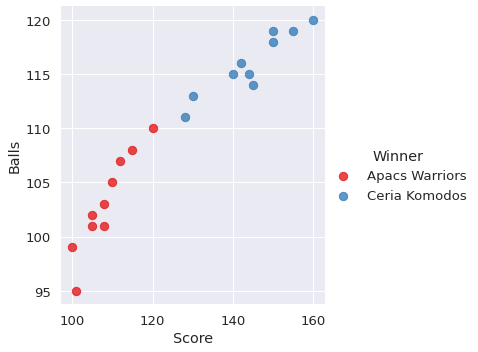

In [18]:
sns.lmplot('Score', 'Balls', data=result, hue='Winner',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [20]:
data = result[['Score', 'Balls']]
winner = np.where(result['Winner']=='Apacs Warriors', 0, 1)

In [21]:
# Fit the SVM model
model = svm.SVC(kernel='linear')
model.fit(data, winner)

SVC(kernel='linear')

In [22]:
# Get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(100,160)
yy = a * xx - (model.intercept_[0]) / w[1]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


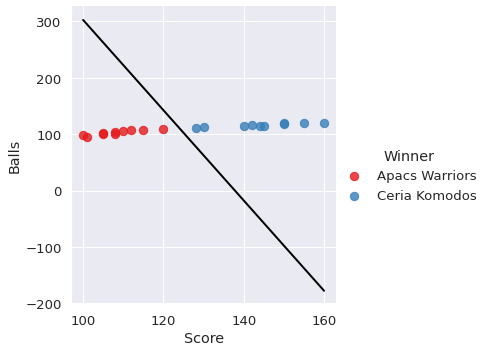

In [23]:
# Plot the hyperplane
sns.lmplot('Score', 'Balls', data=result, hue='Winner',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});
plt.plot(xx, yy, linewidth=2, color='black');

In [24]:
# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


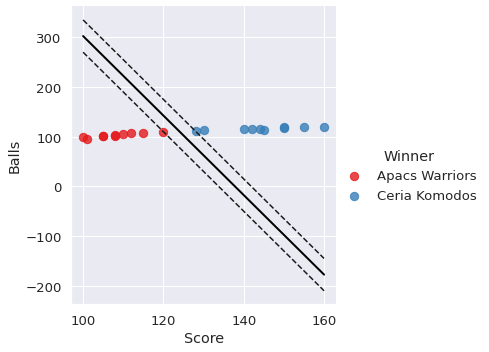

In [25]:
# Look at the margins and support vectors
sns.lmplot('Score', 'Balls', data=result, hue='Winner',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=80, facecolors='none');

In [31]:
def AW_or_CK(Score, Balls):
    if(model.predict([[Score, Balls]]))==0:
        print('For this Situation \'Apacs Wariors\' will win the Match')
    else:
        print('For this Situation \'Ceria Komodos\' will win the Match')

In [32]:
AW_or_CK(105,101)

For this Situation 'Apacs Wariors' will win the Match


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


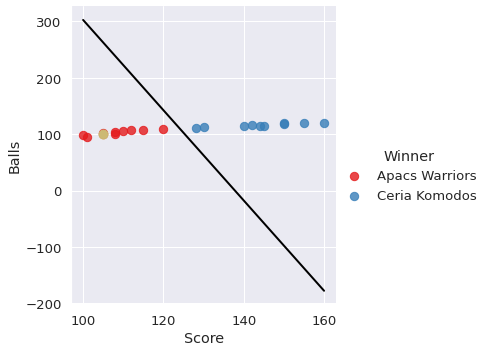

In [33]:
# Plot the point to visually see where the point lies
sns.lmplot('Score', 'Balls', data=result, hue='Winner',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(105,101, 'yo', markersize='9');